# Nama        : Riska Arum M. S.
# NIM         : 4101422126
# Mata Kuliah : Data Mining



# **TUGAS NAIVE BAYES DAN KNN**


## **Soal Praktik**
## 1. Cari dataset klasifikasi dari sumber terbuka seperti Kaggle, UCI Machine Learning Repository, atau lainnya



In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [129]:
data=pd.read_csv('/content/video games sales.csv')

In [130]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Berikut adalah penjelasan setiap variabelnya:

1. Peringkat: Posisi dalam peringkat penjualan
2. Nama: Judul game
3. Platform: Sistem konsol/PC
4. Tahun: Tahun rilis
5. Genre: Jenis game (Aksi, RPG, dll.)
6. Penerbit: Perusahaan yang merilis game
7. NA_Sales: Penjualan di Amerika Utara (dalam jutaan)
8. EU_Sales: Penjualan di Eropa (dalam jutaan)
9. JP_Sales: Penjualan di Jepang (dalam jutaan)
10. Other_Sales: Penjualan di wilayah lain (dalam jutaan)




In [131]:
data.tail(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [132]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Dataset ini memiliki:

*   11 kolom atau variabel
*   16598 baris data atau pengamatan. Akan tetapi terdapat beberapa kolom yang memiliki jumlah baris < 16598, maka akan dilakukan proses identifikasi lebih lanjut.
* Kolom genre dapat digunakan sebagai target klasifikasi (klasifikasi genre game seperti Action, SPorts, dll)



## 2. Pre-Processing Data

### A. Deteksi Missing Value

In [134]:
data.isnull()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


In [135]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [136]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

np.int64(329)

Berdasarkan output summarize tersebut, diperoleh bahwa kolom yang mengandung Missing Values (blanks/ N/A (Python : nan atau NaN)) adalah kolom Year dan Publisher. Dengan jumlah seluruh missing velue adalah 329.

### B. Handling Missing Velue

1. Year

In [137]:
#melihat isi dalam kolom year
data['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

📌**Asumsi terhadap kolom Year**
* Kolom Year berisi tahun rilis video game (misalnya 2006, 2013, dst).
* Tipe datanya float64, kemungkinan karena ada nilai null (NaN) sehingga tidak otomatis jadi int.
* Tahun bersifat numerik ordinal → makin besar nilainya, makin baru gamenya.
* Ada 271 baris kosong dari total 16.598 → sekitar 1.6%, tidak terlalu besar.

💡 **Penanganan missing velue**
Gunakan median karena:
* Kolom Year bersifat numerik ordinal
* Distribusi kemungkinan tidak normal
* Dapat mempertahankan sebanyak mungkin data

In [138]:
#mengisi missing value
data['Year']=data['Year'].fillna(data['Year'].median())

In [139]:
#jumlah missing value
np.sum(data['Year'].isnull())

np.int64(0)

2. Publisher

In [140]:
#melihat isi dalam kolom publisher
data['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


📌 **Asumsi terhadap kolom Publisher**

* Kolom ini berisi nama perusahaan yang menerbitkan game (misalnya Nintendo, Electronic Arts, Ubisoft, dll).
*Tipe datanya adalah object → berarti data kategorikal nominal (tidak punya urutan).
* Nilainya bisa sangat beragam dan tidak berurutan secara logis.
* Terdapat 58 baris kosong dari 16.598 → hanya sekitar 0.35%. Jumlah ini sangat kecil, sehingga tidak terlalu berdampak besar terhadap keseluruhan data


💡 **Penanganan missing velue**
Gunakan label "Unknown" untuk missing value pada Publisher:
* Kategorikal → tidak harus akurat, cukup konsisten
* Mudah ditangani saat encoding
* Tidak perlu membuang baris data

In [141]:
#mengisi missing value
data['Publisher'].fillna('Unknown',inplace=True)

<ipython-input-141-4c8de19b3622>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Publisher'].fillna('Unknown',inplace=True)


In [142]:
#jumlah missing value
np.sum(data['Publisher'].isnull())

np.int64(0)

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### C. Penanganan Outlier

Cek outlier menggunakan Bloxplot dan IQR, kemudian penanganan outlier dengan menghapus outlier karena jumlahnya sedikit.

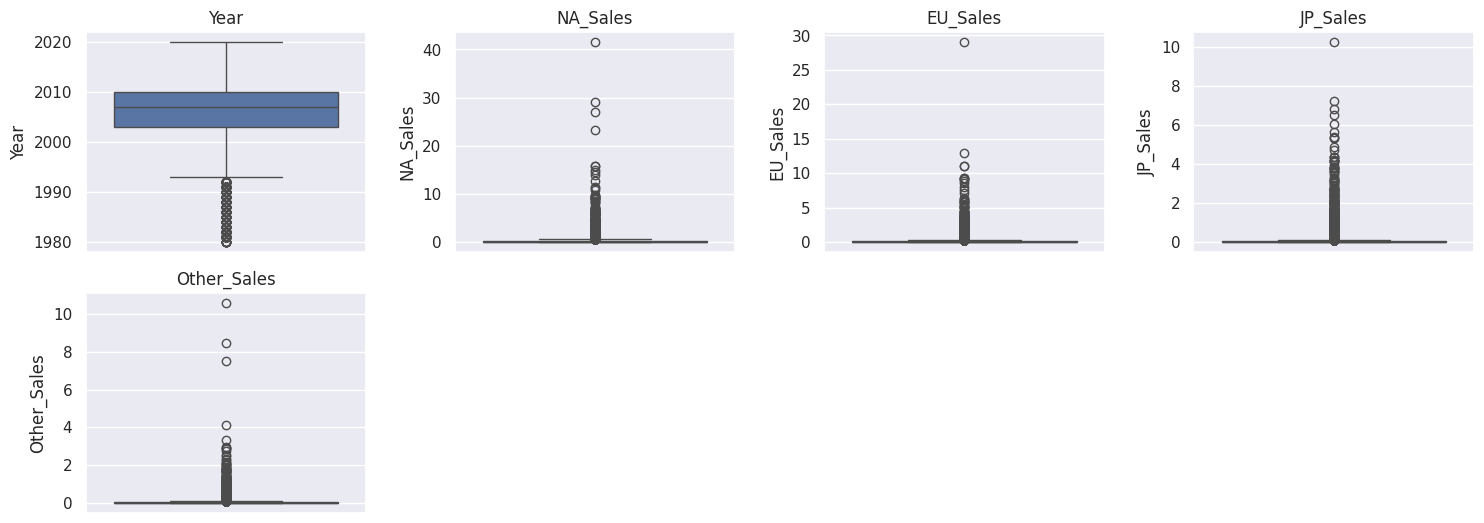

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [145]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Kolom numerik yang ingin dicek
num_cols = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

# Tangani outlier: Hapus baris yang mengandung outlier di kolom mana pun
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print("\nSetelah outlier dibersihkan:")
print(data.shape)


Year: 305 outliers
NA_Sales: 1681 outliers
EU_Sales: 2081 outliers
JP_Sales: 2425 outliers
Other_Sales: 1665 outliers

Setelah outlier dibersihkan:
(10618, 11)


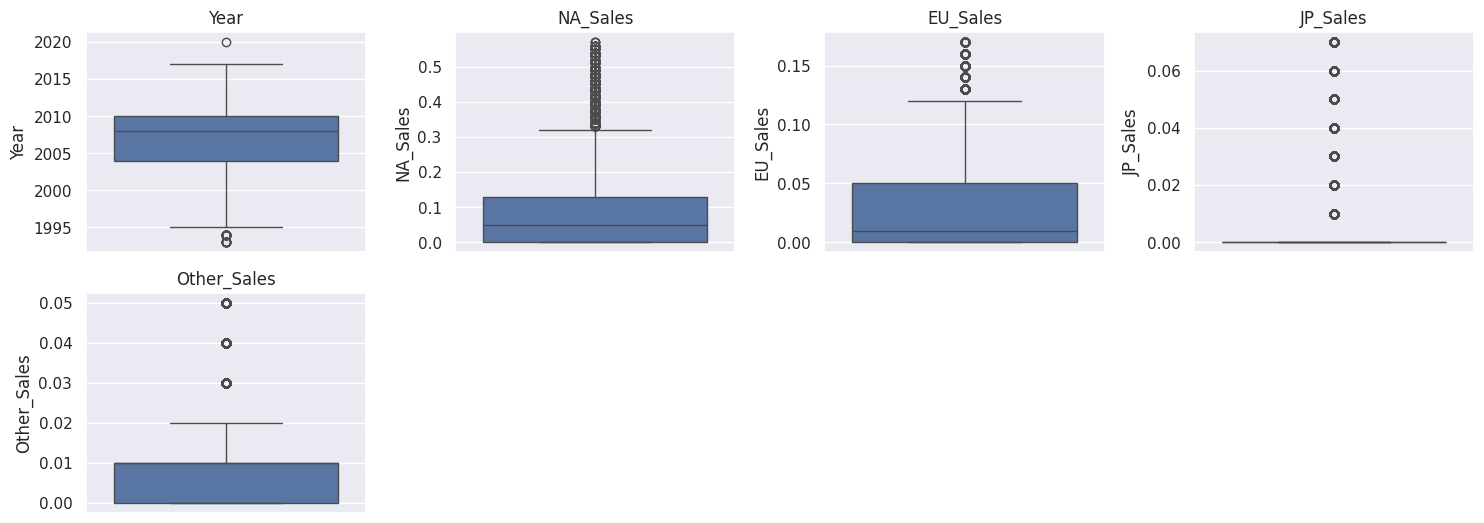

In [146]:
#cek boxplot lagi

num_cols = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### D. Encoding Data Kategorik

Pada dataset video games seles, kolom platform, publisher, dan genre perlu diubah dari kategorik menjadi numerik menggunakan One-Hot dan Lebel Encoding.

In [147]:
#melihat isi dalam kolom
data['Platform'].unique()

array(['X360', 'N64', 'XB', 'GC', 'Wii', 'XOne', 'GBA', 'PS3', 'DS',
       '3DS', 'PSP', 'PC', '2600', 'WiiU', 'PS', 'PS2', 'PS4', 'NES',
       'PSV', 'SNES', 'SAT', 'SCD', 'GB', 'DC', 'GEN', 'NG', '3DO', 'WS',
       'PCFX', 'TG16'], dtype=object)

In [148]:
data['Publisher'].unique()

array(['Avanquest Software', 'GT Interactive', 'Atari', 'THQ',
       'Electronic Arts', 'Konami Digital Entertainment',
       'Universal Interactive', 'Acclaim Entertainment', 'Activision',
       'Disney Interactive Studios', 'Microsoft Game Studios',
       'Tomy Corporation', 'LucasArts', 'Ubisoft', 'MTV Games',
       'TDK Mediactive', 'Rondomedia', 'Nintendo', 'Vivendi Games',
       'Take-Two Interactive', 'Namco Bandai Games',
       'Red Storm Entertainment', 'Unknown', 'Capcom', 'Gotham Games',
       '505 Games', 'Majesco Entertainment', 'Bethesda Softworks',
       'Spike', 'Warner Bros. Interactive Entertainment', 'Midway Games',
       'Sony Computer Entertainment', 'SouthPeak Games',
       'Rising Star Games', 'Trion Worlds', 'Zoo Digital Publishing',
       'Infogrames', 'Virgin Interactive', 'Destineer', 'Deep Silver',
       'D3Publisher', 'Empire Interactive', 'Sega', 'Mindscape',
       'Square Enix', 'Crave Entertainment', 'Nippon Ichi Software',
       'Scholast

In [149]:
data['Genre'].unique()

array(['Adventure', 'Fighting', 'Platform', 'Strategy', 'Shooter',
       'Sports', 'Action', 'Racing', 'Misc', 'Simulation', 'Puzzle',
       'Role-Playing'], dtype=object)

In [150]:
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding untuk kolom Platform
data = pd.get_dummies(data, columns=['Platform'])

# Label Encoding untuk Publisher dan Genre
le = LabelEncoder()
data['Publisher'] = le.fit_transform(data['Publisher'])
le_genre = LabelEncoder()
data['Genre'] = le_genre.fit_transform(data['Genre'])


In [152]:
# Print beberapa baris pertama dari data hasil encoding
print(dict(zip(le_platform.classes_, le_platform.transform(le_platform.classes_))))
print(data['Publisher'].head())
print(dict(zip(le_genre.classes_, le_genre.transform(le_genre.classes_))))

{'2600': np.int64(0), '3DO': np.int64(1), '3DS': np.int64(2), 'DC': np.int64(3), 'DS': np.int64(4), 'GB': np.int64(5), 'GBA': np.int64(6), 'GC': np.int64(7), 'GEN': np.int64(8), 'N64': np.int64(9), 'NES': np.int64(10), 'NG': np.int64(11), 'PC': np.int64(12), 'PCFX': np.int64(13), 'PS': np.int64(14), 'PS2': np.int64(15), 'PS3': np.int64(16), 'PS4': np.int64(17), 'PSP': np.int64(18), 'PSV': np.int64(19), 'SAT': np.int64(20), 'SCD': np.int64(21), 'SNES': np.int64(22), 'TG16': np.int64(23), 'WS': np.int64(24), 'Wii': np.int64(25), 'WiiU': np.int64(26), 'X360': np.int64(27), 'XB': np.int64(28), 'XOne': np.int64(29)}
2761     52
2799    161
2805     47
2813    435
2823    123
Name: Publisher, dtype: int64
{'Action': np.int64(0), 'Adventure': np.int64(1), 'Fighting': np.int64(2), 'Misc': np.int64(3), 'Platform': np.int64(4), 'Puzzle': np.int64(5), 'Racing': np.int64(6), 'Role-Playing': np.int64(7), 'Shooter': np.int64(8), 'Simulation': np.int64(9), 'Sports': np.int64(10), 'Strategy': np.int64

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10618 entries, 2761 to 16597
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           10618 non-null  int64  
 1   Name           10618 non-null  object 
 2   Year           10618 non-null  float64
 3   Genre          10618 non-null  int64  
 4   Publisher      10618 non-null  int64  
 5   NA_Sales       10618 non-null  float64
 6   EU_Sales       10618 non-null  float64
 7   JP_Sales       10618 non-null  float64
 8   Other_Sales    10618 non-null  float64
 9   Global_Sales   10618 non-null  float64
 10  Platform_2600  10618 non-null  bool   
 11  Platform_3DO   10618 non-null  bool   
 12  Platform_3DS   10618 non-null  bool   
 13  Platform_DC    10618 non-null  bool   
 14  Platform_DS    10618 non-null  bool   
 15  Platform_GB    10618 non-null  bool   
 16  Platform_GBA   10618 non-null  bool   
 17  Platform_GC    10618 non-null  bool   
 18  Platform

### E. Pilih Fitur dan Lebel/Target

**TARGET**
Dipilih Genre sebagai kolom target karena berisi label kategori yang ingin diprediksi melalui klasifikasi. Fitur-fitur seperti Platform, Publisher, dan Sales memberikan informasi yang berpotensi memengaruhi genre sebuah game. Dengan pendekatan ini, model akan belajar pola dari data untuk mengklasifikasikan genre berdasarkan fitur-fitur yang tersedia.

**Lebel/Fitur**
Fitur adalah semua kolom numerik dan kolom hasil encoding (selain genre).

Sebelum memisahkan variabel X dan y, diperiksa terlebih dahulu korelasi antara target dan fitur.

In [154]:
count_values = data['Genre'].value_counts()
count_values

,count
Genre,
0,2099
10,1426
3,1203
1,1048
6,854
8,784
7,735
9,594
4,531


In [155]:
# Menghitung rata-rata berdasarkan nilai 'Genre'
mean_by_genre = data.groupby('Genre').mean(numeric_only=True)

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'Genre'
print(mean_by_genre)


               Rank         Year   Publisher  NA_Sales  EU_Sales  JP_Sales  \
Genre                                                                        
0      10438.262982  2008.364936  262.494045  0.091553  0.036270  0.007832   
1      12792.095420  2008.738550  246.032443  0.040372  0.017338  0.015410   
2      10325.056399  2005.995662  265.366594  0.095748  0.034295  0.013406   
3      10520.408978  2007.594347  285.931006  0.098313  0.027440  0.007473   
4       9894.382298  2005.229755  285.000000  0.110923  0.040038  0.003409   
5      11732.108491  2006.898585  266.436321  0.072288  0.019080  0.004009   
6      10377.614754  2005.264637  241.696721  0.093197  0.038899  0.002084   
7      11489.723810  2008.081633  262.670748  0.056571  0.024122  0.019129   
8      10485.515306  2006.065051  242.633929  0.092474  0.039477  0.003265   
9      10735.700337  2007.484848  260.870370  0.102172  0.023872  0.005556   
10      9717.800842  2005.967742  236.894109  0.123212  0.033668

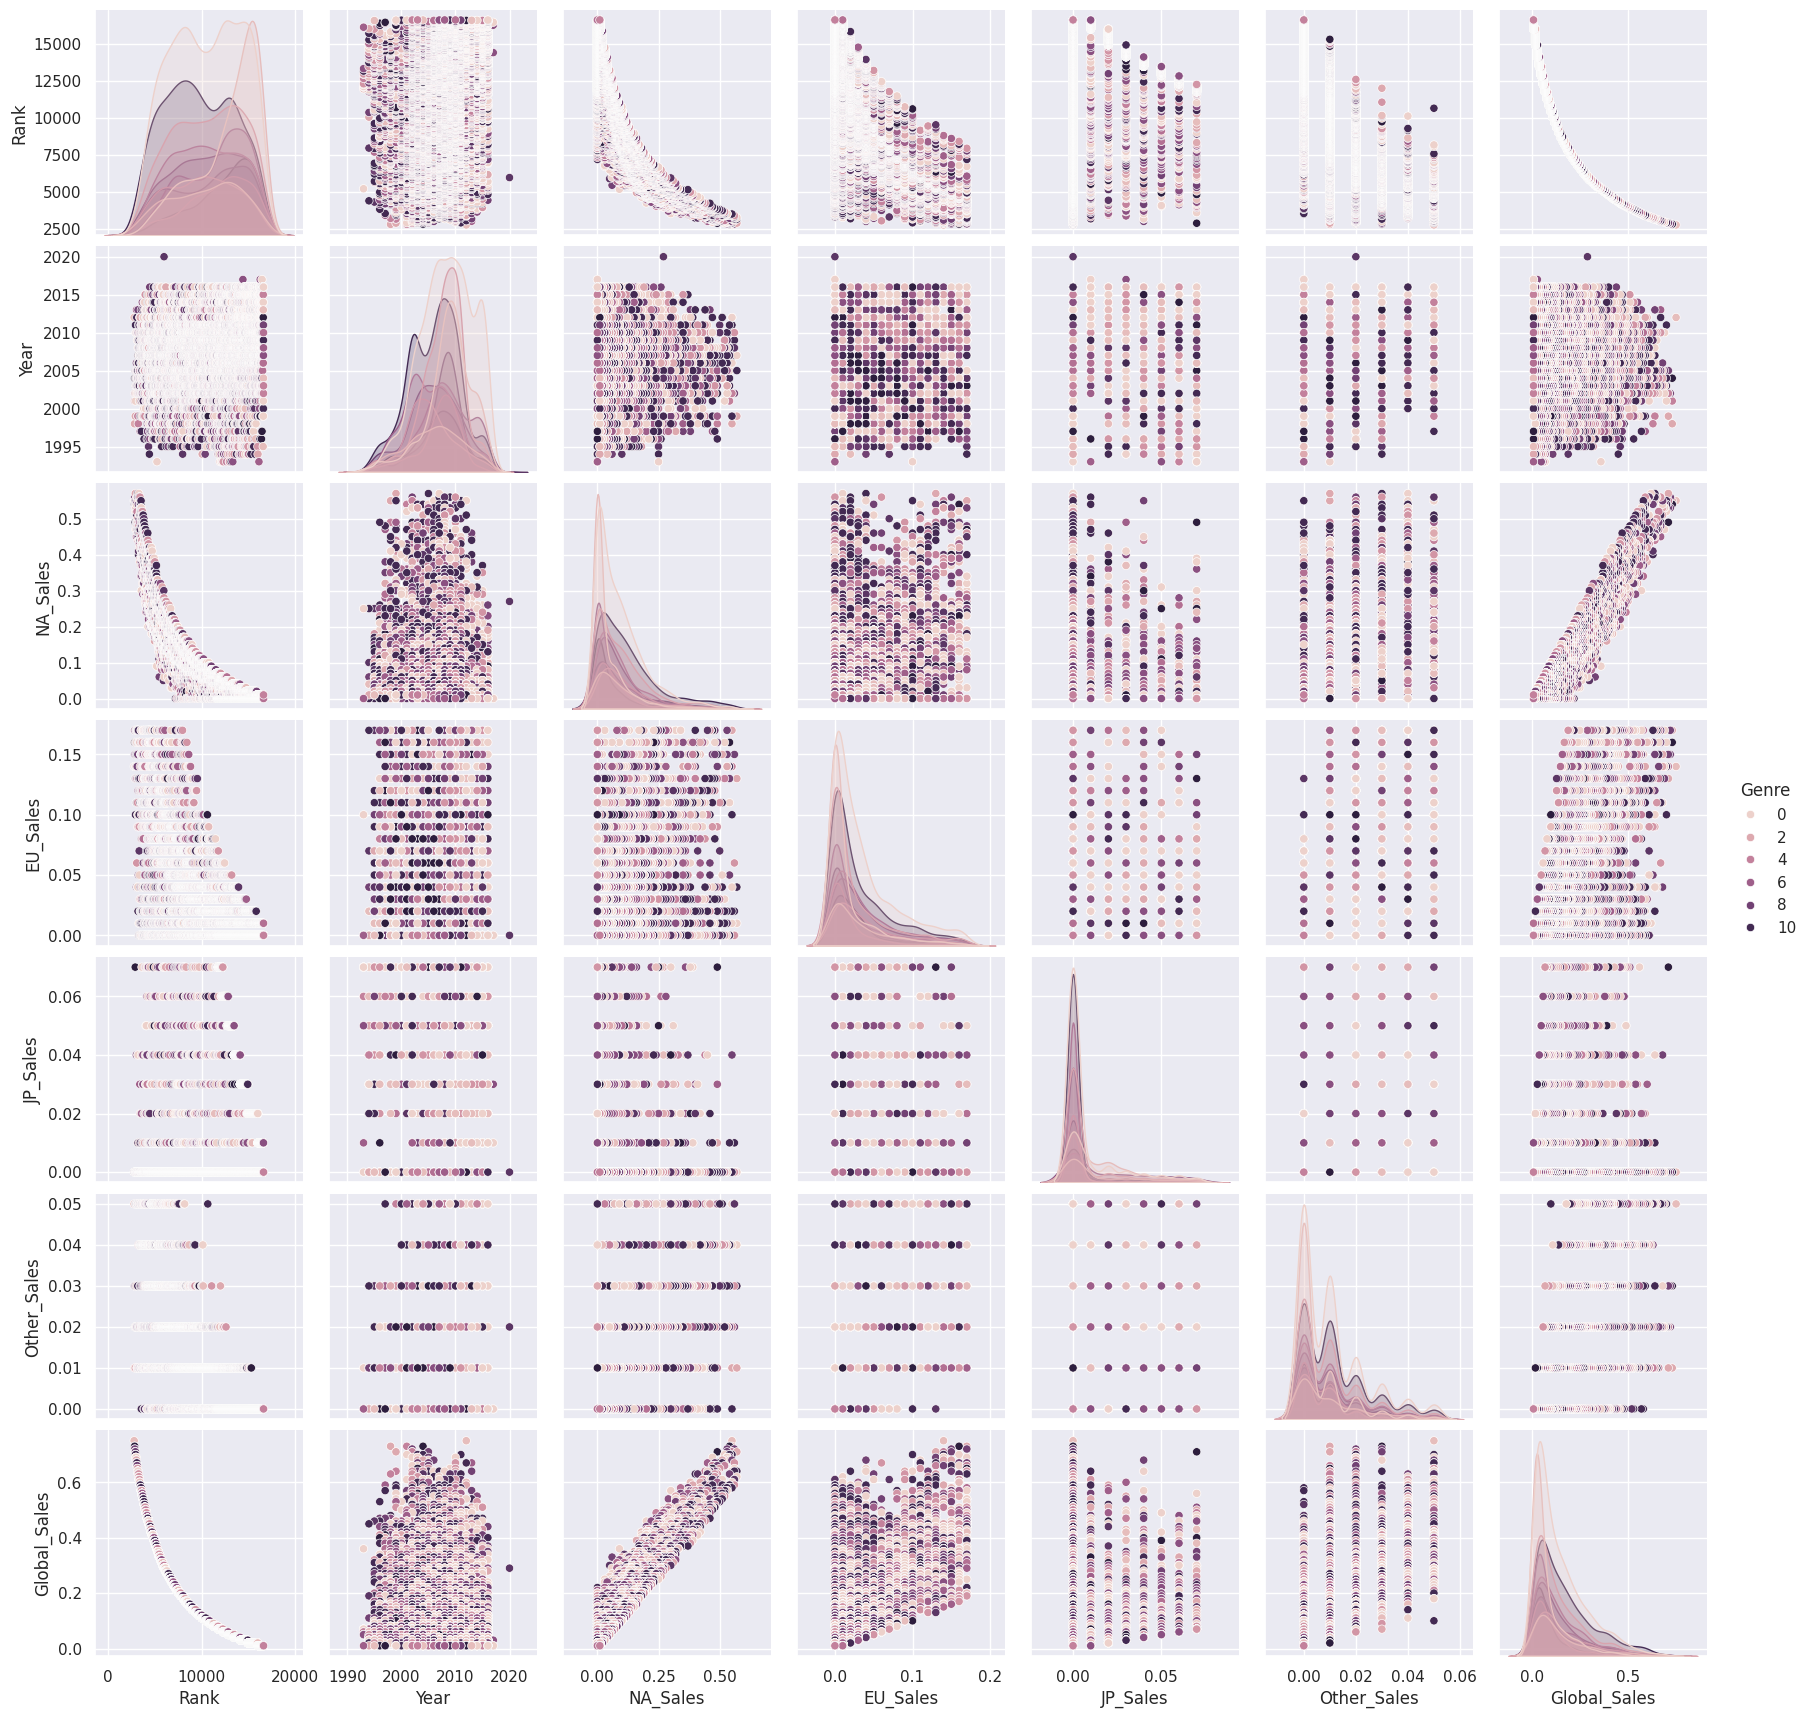

In [157]:
#visualisasi. warna dibedakan berdasarkan genrenya
sns.pairplot(data, vars=['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], hue='Genre')

In [160]:
# Menghitung korelasi antara setiap variabel dengan 'Genre'
# Exclude non-numeric columns, especially 'Name'
numerical_features = data.select_dtypes(include=np.number).columns
correlation_with_genre = data[numerical_features].corr()['Genre'].sort_values(ascending=False)

# Menampilkan korelasi setiap variabel dengan 'Genre'
print(correlation_with_genre)

Genre           1.000000
NA_Sales        0.060485
Global_Sales    0.040343
Other_Sales     0.034552
EU_Sales        0.006085
Publisher      -0.031744
Rank           -0.046610
JP_Sales       -0.104489
Year           -0.157654
Name: Genre, dtype: float64


In [162]:
# Ambil kolom yang merupakan hasil one-hot encoding dari Platform
platform_columns = [col for col in data.columns if col.startswith('Platform_')]

# Korelasi antara setiap Platform (hasil one-hot) dengan Genre
correlation_platform_genre = data[platform_columns].corrwith(data['Genre']).sort_values(ascending=False)

# Tampilkan hasil korelasi
print("Korelasi antara masing-masing Platform dengan Genre:\n")
print(correlation_platform_genre)

Korelasi antara masing-masing Platform dengan Genre:

Platform_PC      0.110388
Platform_XB      0.049485
Platform_PS      0.047821
Platform_N64     0.032639
Platform_GC      0.022919
Platform_WS      0.015951
Platform_PS2     0.014113
Platform_Wii     0.012708
Platform_X360    0.010421
Platform_TG16    0.008226
Platform_SNES    0.006457
Platform_PCFX    0.005652
Platform_3DO     0.000870
Platform_SCD    -0.000283
Platform_GB     -0.001571
Platform_DC     -0.003904
Platform_SAT    -0.005356
Platform_NG     -0.006939
Platform_GEN    -0.008596
Platform_2600   -0.009620
Platform_NES    -0.012372
Platform_PS3    -0.013082
Platform_DS     -0.023957
Platform_XOne   -0.024556
Platform_GBA    -0.031420
Platform_PS4    -0.037563
Platform_WiiU   -0.047404
Platform_PSP    -0.057019
Platform_3DS    -0.064730
Platform_PSV    -0.089188
dtype: float64


**Kesimpulan Korelasi**

* Tidak ada korelasi kuat antara platform dan genre (semua nilai < 0.2).
* Namun, beberapa platform seperti PC lebih cenderung memiliki game dengan genre berlabel tinggi, sedangkan PSV dan 3DS lebih ke genre berlabel rendah.
* Korelasi bisa membantu analisis awal, tapi untuk eksplorasi yang lebih dalam, kamu bisa gunakan visualisasi seperti bar chart atau heatmap.

In [173]:
# Memisahkan data menjadi variabel x dan y
X = data.drop(['Genre', 'Name'], axis=1)
y = data['Genre']

In [175]:
# Normalisasi kolom numerik
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerik = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
X[numerik] = scaler.fit_transform(X[numerik])

### F. Membagi data menjadi Data Training dan Testing

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [177]:
# 4. Menormalisasikan data training dan data testing
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[0.41560983 0.62962963 0.52156863 ... 0.         0.         0.        ]
 [0.67244003 0.03703704 0.8        ... 0.         0.         0.        ]
 [0.15102544 0.51851852 0.85294118 ... 0.         0.         0.        ]
 ...
 [0.61091383 0.33333333 0.11568627 ... 0.         0.         0.        ]
 [0.17073701 0.74074074 0.03921569 ... 0.         0.         0.        ]
 [0.75693891 0.44444444 0.48431373 ... 0.         1.         0.        ]]


## 3. a. Klasifikasi Menggunakan Naive Bayes

In [206]:
# 1. Buat dan latih model Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [207]:
nb.score(X_train, y_train)

0.18719095832352248

In [198]:
# 2. Prediksi
y_pred_nb = nb.predict(X_test)

In [211]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# 3. Evaluasi dengan confusion matrix dan akurasi
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n=== {model_name} ===")
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Panggil fungsi evaluasi untuk Naive Bayes
evaluate_model(y_test, y_pred_nb, "Naive Bayes")


=== Naive Bayes ===
Akurasi: 0.06497175141242938
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.02      0.04       449
           1       0.00      0.00      0.00       216
           2       0.00      0.00      0.00        84
           3       0.00      0.00      0.00       234
           4       0.20      0.01      0.02        97
           5       0.06      0.82      0.12        96
           6       0.00      0.00      0.00       147
           7       0.13      0.13      0.13       140
           8       0.04      0.01      0.02       157
           9       0.04      0.21      0.07       128
          10       0.00      0.00      0.00       284
          11       0.07      0.02      0.03        92

    accuracy                           0.06      2124
   macro avg       0.09      0.10      0.04      2124
weighted avg       0.13      0.06      0.03      2124



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


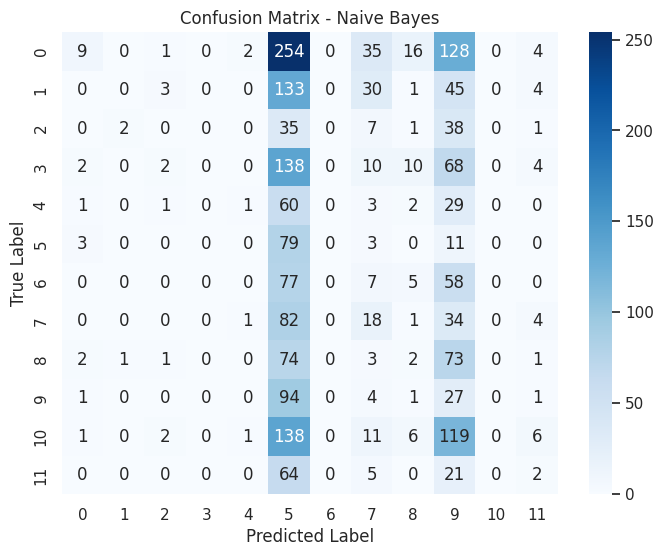

In [204]:
# Buat confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# 4. Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
## 3. b. Kasifikasi menggunakan K-Nearest Neighbors

=== KNN Classification Report ===
Akurasi: 0.1902071563088512
              precision    recall  f1-score   support

           0       0.25      0.50      0.33       449
           1       0.22      0.29      0.25       216
           2       0.01      0.01      0.01        84
           3       0.14      0.14      0.14       234
           4       0.02      0.01      0.01        97
           5       0.16      0.04      0.07        96
           6       0.06      0.04      0.05       147
           7       0.12      0.06      0.08       140
           8       0.13      0.06      0.08       157
           9       0.16      0.05      0.08       128
          10       0.20      0.17      0.18       284
          11       0.00      0.00      0.00        92

    accuracy                           0.19      2124
   macro avg       0.12      0.12      0.11      2124
weighted avg       0.16      0.19      0.16      2124



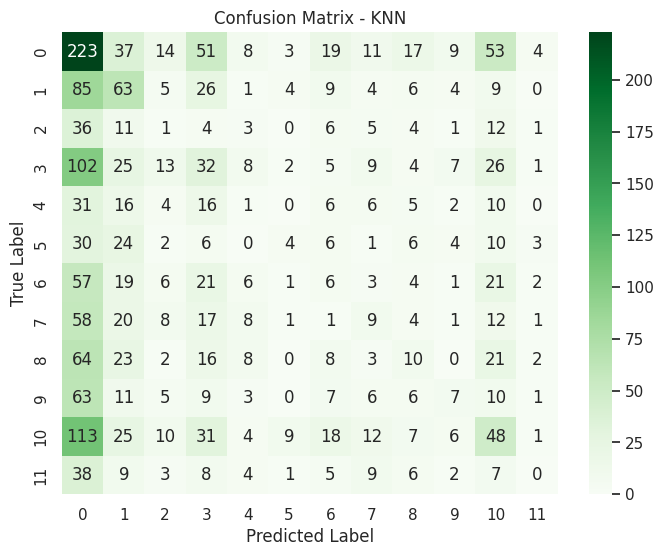

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Pisahkan fitur dan target
X = data.drop(['Genre', 'Name'], axis=1)  # 'Genre' = target, 'Name' tidak relevan untuk klasifikasi
y = data['Genre']

# 2. Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Buat model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# 4. Latih model dengan data latih
knn_model.fit(X_train, y_train)

# 5. Lakukan prediksi pada data uji
y_pred_knn = knn_model.predict(X_test)

# 6. Evaluasi model
print("=== KNN Classification Report ===")
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# 7. Visualisasi confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## 3. c. Perbandingan Naive Bayes dan KNN

**1) Berdasarkan Akurasi**
Pada klasifikasi Naive Bayes diperoleh akurasi sebesar 0,0649 = 6,49%. Sedangkan klasifikasi KNN mendapatkan akurasi sebesar 0,1902 = 19,02%.  Maka dapat disimpulkan bahwa KNN memiliki akurasi jauh lebih tinggi dibandingkan Naive Bayes. Ini menunjukkan bahwa KNN lebih mampu menangkap pola dalam data ini dibanding Naive Bayes.

**2) Classification Report**
Naive Bayes Classification Report:
* Precision rata-rata (macro avg): 0.09
* Recall rata-rata (macro avg): 0.10
* F1-score rata-rata (macro avg): 0.04
* Performa paling tinggi pada label 5 (recall 0.82), namun precision dan f1-score tetap rendah, artinya banyak false positives.

KNN Classification Report:
*Precision rata-rata (macro avg): 0.12
* Recall rata-rata (macro avg): 0.12
* F1-score rata-rata (macro avg): 0.11
* Banyak label dengan performa buruk, namun label 0 menunjukkan f1-score yang paling tinggi (0.33), meskipun tetap rendah.
Dapat disimpulkan bahwa KNN memiliki performa lebih merata dan stabil meskipun secara umum tetap rendah. Dan Naive Bayes sangat tidak stabil, terlihat dari recall tinggi di label 5 namun precision sangat rendah.

**3) Confusion Matrix**
* Naive Bayes:
Mayoritas prediksi condong ke satu kelas saja, terutama label 5. Misalnya: semua true label dari 0, 1, 3, 4, dst banyak diprediksi menjadi label 5 → overfitting pada satu kelas.
* KNN: Distribusi prediksi lebih menyebar dibanding Naive Bayes. Meskipun tidak akurat, KNN menunjukkan berbagai label bisa diprediksi secara bervariasi, meskipun banyak salah.
Sehingga terlihat bahwa KNN lebih baik dalam membagi prediksi antar kelas, meski masih sering salah. Sedangkan Naive Bayes memiliki masalah serius yaitu klasifikasi tidak seimbang, condong ke satu kelas → sangat tidak akurat secara umum.

**KESIMPULAN**
Berdasarkan hasil evaluasi, model K-Nearest Neighbors (KNN) menunjukkan performa yang lebih baik dibandingkan dengan Naive Bayes dalam hal klasifikasi pada data yang digunakan. Hal ini terlihat dari nilai akurasi KNN sebesar 19,02%, yang jauh lebih tinggi dibandingkan Naive Bayes yang hanya mencapai 6,49%. Selain itu, nilai precision, recall, dan f1-score rata-rata (macro average) pada model KNN juga lebih tinggi, yang mengindikasikan bahwa prediksi KNN meskipun masih rendah secara keseluruhan, memiliki kestabilan dan pemerataan performa antar kelas. Sementara itu, model Naive Bayes tampak condong memprediksi sebagian besar data ke satu kelas saja, yang terlihat jelas pada confusion matrix-nya, sehingga menyebabkan ketidakseimbangan klasifikasi. Kelemahan ini menghasilkan nilai f1-score yang sangat rendah, khususnya pada sebagian besar label, walaupun terdapat recall tinggi pada label tertentu yang tidak didukung oleh precision yang sebanding. Secara keseluruhan, KNN lebih stabil dan relevan untuk digunakan dalam kasus ini dibandingkan Naive Bayes.